Country with Maximum Jobs: Germany (814 jobs)


C:\Users\raman\AppData\Local\Temp\ipykernel_7288\608384796.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jobs_by_country.head(10).index, y=jobs_by_country.head(10).values, palette="viridis")


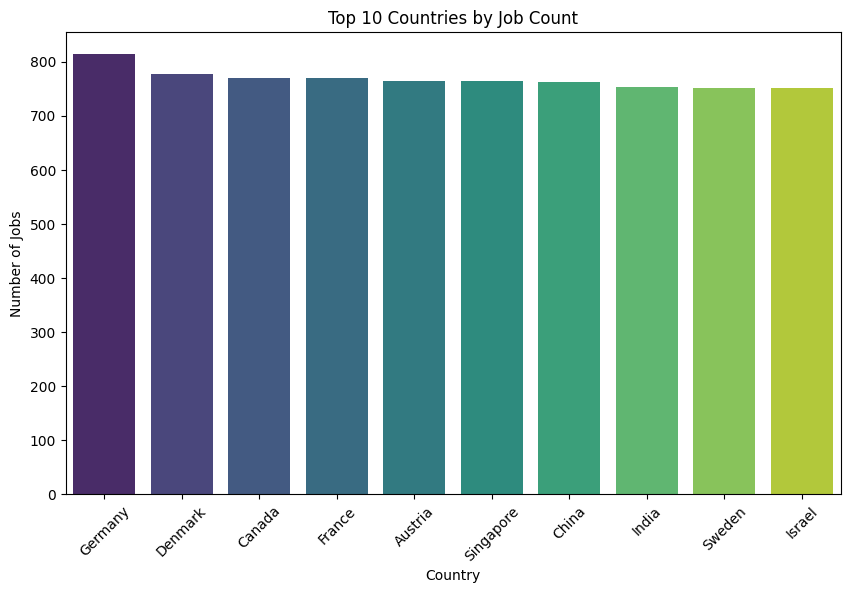


Salary Prediction MAE: 42635.61101513067
Salary Prediction R²: 0.19117716317581956

 Highest Paying Job: AI Specialist with Avg Salary: 120570.75824175825


C:\Users\raman\AppData\Local\Temp\ipykernel_7288\608384796.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_job.head(10).index, y=avg_salary_by_job.head(10).values, palette="magma")


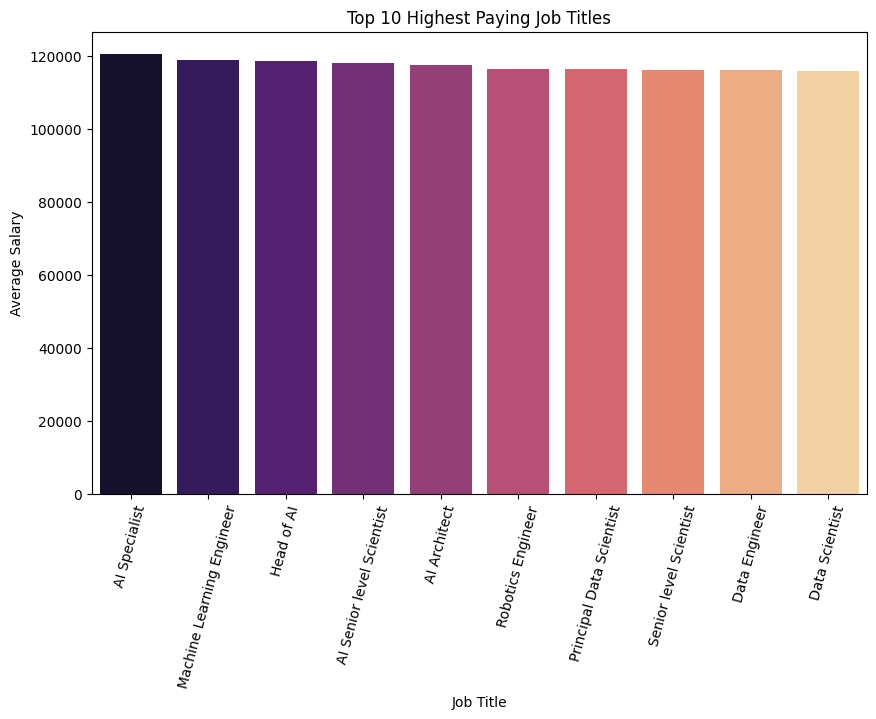


 Country with Highest Average Salary: Switzerland with Avg Salary: 170639.0857908847


C:\Users\raman\AppData\Local\Temp\ipykernel_7288\608384796.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_country.head(10).index, y=avg_salary_by_country.head(10).values, palette="coolwarm")


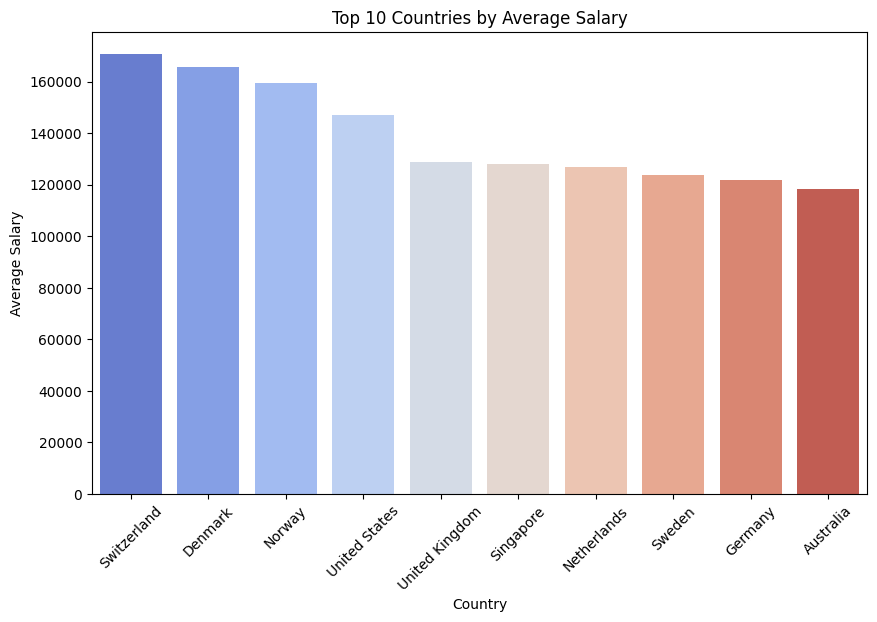

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
# Load Excel file
df = pd.read_excel(r"C:\Users\raman\OneDrive\Documents\Downloads\CleanedExcelproject1.xlsx")
# 1. COUNTRY WITH MAX JOBS
jobs_by_country = df["Company_Location"].value_counts()
max_jobs_country = jobs_by_country.idxmax()
max_jobs_count = jobs_by_country.max()
print(f"Country with Maximum Jobs: {max_jobs_country} ({max_jobs_count} jobs)")
# Plot Top 10 countries by jobs
plt.figure(figsize=(10,6))
sns.barplot(x=jobs_by_country.head(10).index, y=jobs_by_country.head(10).values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Job Count")
plt.ylabel("Number of Jobs")
plt.xlabel("Country")
plt.show()
# 2. HIGHEST PAYING JOB PREDICTION
df_encoded = df.copy()
le_title = LabelEncoder()
df_encoded["Job_Title_Encoded"] = le_title.fit_transform(df["Job_Title"])
le_country = LabelEncoder()
df_encoded["Company_Location_Encoded"] = le_country.fit_transform(df["Company_Location"])
# Features (Job Title + Country) and Target (Salary)
X = df_encoded[["Job_Title_Encoded", "Company_Location_Encoded"]]
y = df_encoded["Salary"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
# Predictions
y_pred = rf_model.predict(X_test)
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nSalary Prediction MAE: {mae}")
print(f"Salary Prediction R²: {r2}")
# Average salary per job
avg_salary_by_job = df.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False)
highest_paying_job = avg_salary_by_job.idxmax()
highest_salary = avg_salary_by_job.max()
print(f"\n Highest Paying Job: {highest_paying_job} with Avg Salary: {highest_salary}")
# Plot Top 10 highest paying jobs
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_job.head(10).index, y=avg_salary_by_job.head(10).values, palette="magma")
plt.xticks(rotation=75)
plt.title("Top 10 Highest Paying Job Titles")
plt.ylabel("Average Salary")
plt.xlabel("Job Title")
plt.show()
# 3. COUNTRY WITH HIGHEST SALARY
avg_salary_by_country = df.groupby("Company_Location")["Salary"].mean().sort_values(ascending=False)
highest_salary_country = avg_salary_by_country.idxmax()
highest_country_salary = avg_salary_by_country.max()
print(f"\n Country with Highest Average Salary: {highest_salary_country} with Avg Salary: {highest_country_salary}")
# Plot Top 10 countries by salary
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_country.head(10).index, y=avg_salary_by_country.head(10).values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Average Salary")
plt.ylabel("Average Salary")
plt.xlabel("Country")
plt.show()


In [7]:
import pandas as pd
# Load dataset
file_path = r"C:\Users\raman\OneDrive\Documents\Downloads\CleanedExcelproject1.xlsx"
df = pd.read_excel(file_path)
# --- DATA CHECK ---
print("Data Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())
# --- SUMMARY TABLES ---
# 1. Country with most jobs
country_jobs = df['Company_Location'].value_counts().reset_index()
country_jobs.columns = ['Country', 'Job_Count']
top_country_jobs = country_jobs.iloc[0]
# 2. Country with highest average salary
country_salary = df.groupby('Company_Location')['Salary'].mean().reset_index()
country_salary.columns = ['Country', 'Avg_Salary']
top_country_salary = country_salary.sort_values(by='Avg_Salary', ascending=False).iloc[0]
# 3. Job title with highest average salary
job_salary = df.groupby('Job_Title')['Salary'].mean().reset_index()
job_salary.columns = ['Job_Title', 'Avg_Salary']
top_job_salary = job_salary.sort_values(by='Avg_Salary', ascending=False).iloc[0]
# --- FINAL SUMMARY ---
print("\n===== FINAL PREDICTIVE INSIGHTS =====")
print(f" Country with MOST Jobs: {top_country_jobs['Country']} ({top_country_jobs['Job_Count']} jobs)")
print(f" Country with HIGHEST Avg Salary: {top_country_salary['Country']} (${top_country_salary['Avg_Salary']:.2f})")
print(f" Highest Paying Job Title: {top_job_salary['Job_Title']} (${top_job_salary['Avg_Salary']:.2f})")
# --- EXPORT RESULTS TO EXCEL ---
summary = pd.DataFrame({
    "Metric": ["Most Jobs Country", "Highest Salary Country", "Highest Paying Job"],
    "Result": [top_country_jobs['Country'], top_country_salary['Country'], top_job_salary['Job_Title']],
    "Value": [top_country_jobs['Job_Count'], top_country_salary['Avg_Salary'], top_job_salary['Avg_Salary']]
})

output_path = r"C:\Users\raman\Documents\JobMarket_Summary.xlsx"
summary.to_excel(output_path, index=False)
print(f"\n Results exported to {output_path}")


Data Shape: (15000, 20)
Columns: ['Job_Id', 'Job_Title', 'Salary', 'Salary_Currency', 'Experience_Level', 'Employment_Type', 'Company_Location', 'Company_Size', 'Employee_Residence', 'Remote_Ratio', 'Work_Type', 'Skills_Required', 'Eduaction_Required', 'Min_Experience_Required', 'Industry', 'Posting_Date', 'Application_Deadline', 'Job_Description_Length', 'Benefit_Score', 'Company_Name']

Missing values per column:
 Job_Id                     0
Job_Title                  0
Salary                     0
Salary_Currency            0
Experience_Level           0
Employment_Type            0
Company_Location           0
Company_Size               0
Employee_Residence         0
Remote_Ratio               0
Work_Type                  0
Skills_Required            0
Eduaction_Required         0
Min_Experience_Required    0
Industry                   0
Posting_Date               0
Application_Deadline       0
Job_Description_Length     0
Benefit_Score              0
Company_Name               0
